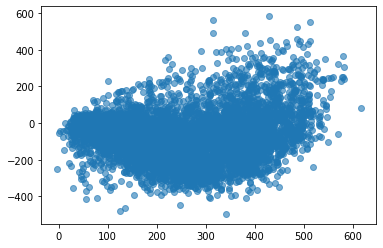

In [3]:
import math
import random
import numpy as np
from matplotlib import pyplot as plt

magic_data = np.genfromtxt("magic04.data", delimiter=',')
X = magic_data[:,range(10)]
X_cen = X-np.mean(X, axis=0)
cov_est = np.dot(X_cen.T, X_cen)/X_cen.shape[0]


def iterated_power(mat, epsilon=0.0001):
    m = np.shape(mat)[0]  # Number of rows
    X = np.matrix([[1.0] for i in range(m)])  # Initialize an empty vector
    eig_tmp, eig_val = 1, 0
    
    while (np.square(np.sum(np.power((eig_val - eig_tmp),2))) > epsilon):
        eig_tmp = eig_val
        ind = np.abs(X).argmax()
        eig_vec = X / X[ind]
        X = mat*eig_vec
        eig_val = (np.transpose(eig_vec)*X).item(0)
    return (eig_val, eig_vec)


# Compute the rest of the eigen values/vectors from the biggest one
def components(A,max_iter):
    cnt = 1
    A = np.matrix(A)  # Transform into a numpy matrix
    result = iterated_power(A)

    big_eigVal, big_eigVec = result[0], result[1]
    eig_values = [big_eigVal]  # Create a list for eigen values
    eig_vectors = big_eigVec  # Create a matrix for eigen vectors
    while (cnt != max_iter):
        eigVec_tmp = big_eigVec / (np.transpose(big_eigVec) * big_eigVec)
        A = A - big_eigVal * big_eigVec * np.transpose(eigVec_tmp)

        # Apply iterated power method on the updated matrix
        result = iterated_power(A)

        big_eigVal, big_eigVec = result[0], result[1]

        eig_values.append(big_eigVal)

        eig_vectors = np.hstack((eig_vectors, big_eigVec))
        cnt += 1
    return (eig_values, eig_vectors)
 
eig_values, eig_vectors = components(cov_est,2)
           

data_reduced = np.dot(X,eig_vectors)
x = np.squeeze(np.asarray(data_reduced))
plt.scatter(x[:,0],-x[:,1],alpha=0.6)
plt.show()
